In [1]:
import pandas as pd
import numpy as np

In [2]:
EMBEDDING_DIM = 300      
NUM_MOLECULES = 133244  

In [ ]:
# mol2vec output
df = pd.read_csv('..\..\QM9\out.csv')
# Eliminar primeras 3 entradas
df = df.drop(df.index[0:3])
df = df.reset_index(drop=True)
df['Unnamed: 0'] = df['Unnamed: 0'] - 3

X = df.iloc[:, 3:]

print(X.shape)
# Check for NaN values
print(X.isnull().sum().sum())
# Check for infinite values
print(np.isinf(X).sum().sum())


(133244, 300)
0
0


Mahalanobis (Tiende a mandar error)

c:\Users\locua\anaconda3\Lib\site-packages\pynndescent\pynndescent_.py:939: UserWarning: Failed to correctly find n_neighbors for some samples. Results may be less than ideal. Try re-running with different parameters.
  warn(


(133244, 2)


C:\Users\locua\AppData\Local\Temp\ipykernel_21992\2504918196.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=0.1, cmap='Spectral')


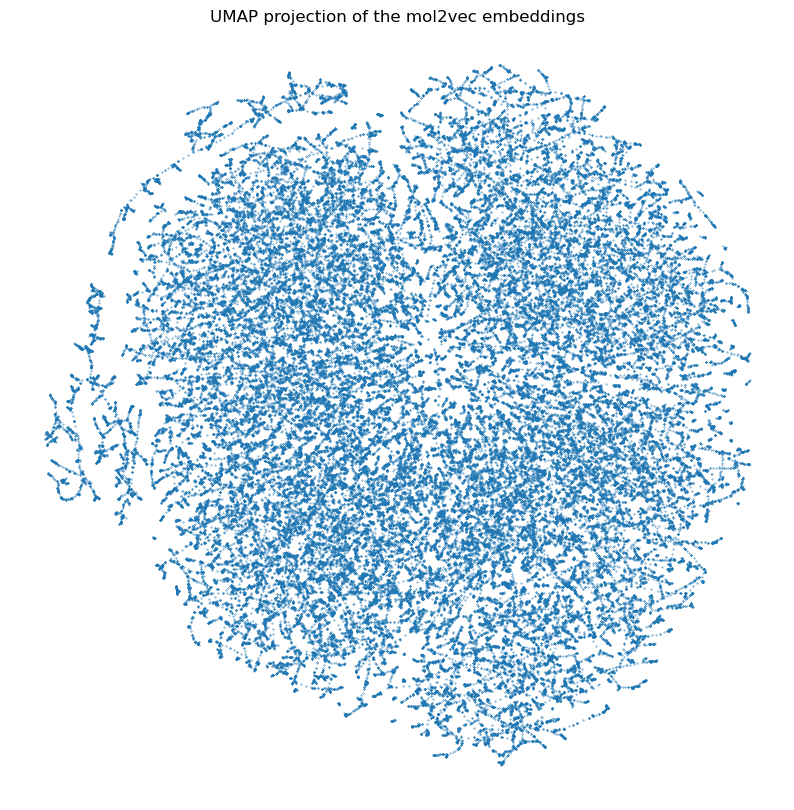

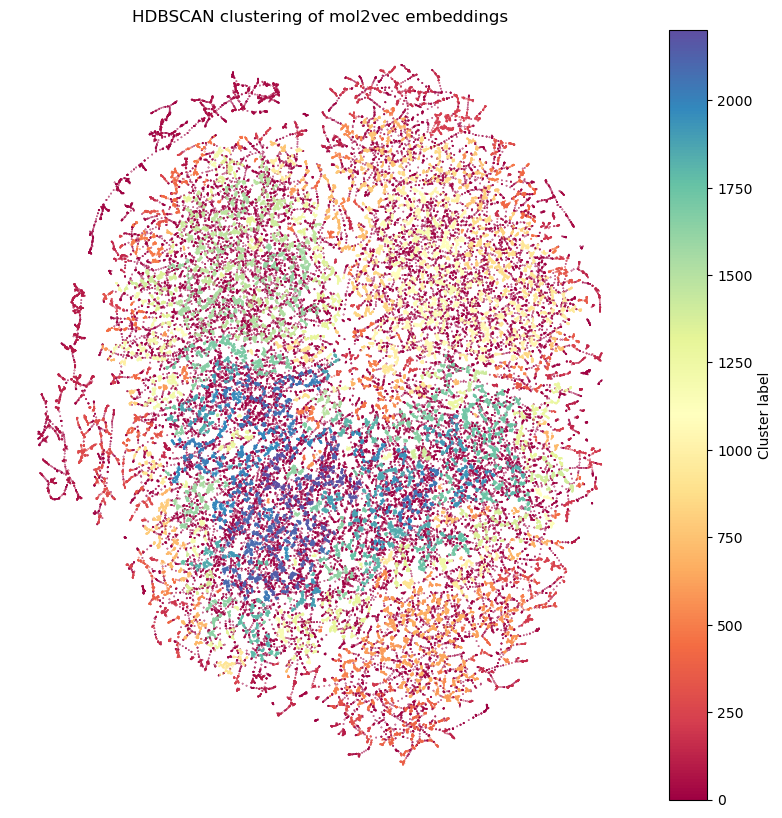

In [5]:
import umap
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import hdbscan
import seaborn as sns

embedding = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='mahalanobis').fit_transform(X)
print(embedding.shape)

plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], s=0.1, cmap='Spectral')
plt.title('UMAP projection of the mol2vec embeddings')
plt.axis('off')
plt.savefig('umap.png', dpi=300, bbox_inches='tight')
plt.show()

# Clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom').fit(embedding)

# Plotting clusters
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusterer.labels_, s=0.1, cmap='Spectral')
plt.title('HDBSCAN clustering of mol2vec embeddings')
plt.axis('off')
plt.colorbar(label='Cluster label')
plt.savefig('clusters.png', dpi=300, bbox_inches='tight')
plt.show()

Pruebas

c:\Users\locua\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


(133244, 2)


C:\Users\locua\AppData\Local\Temp\ipykernel_21992\1765776864.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=0.1, cmap='Spectral')


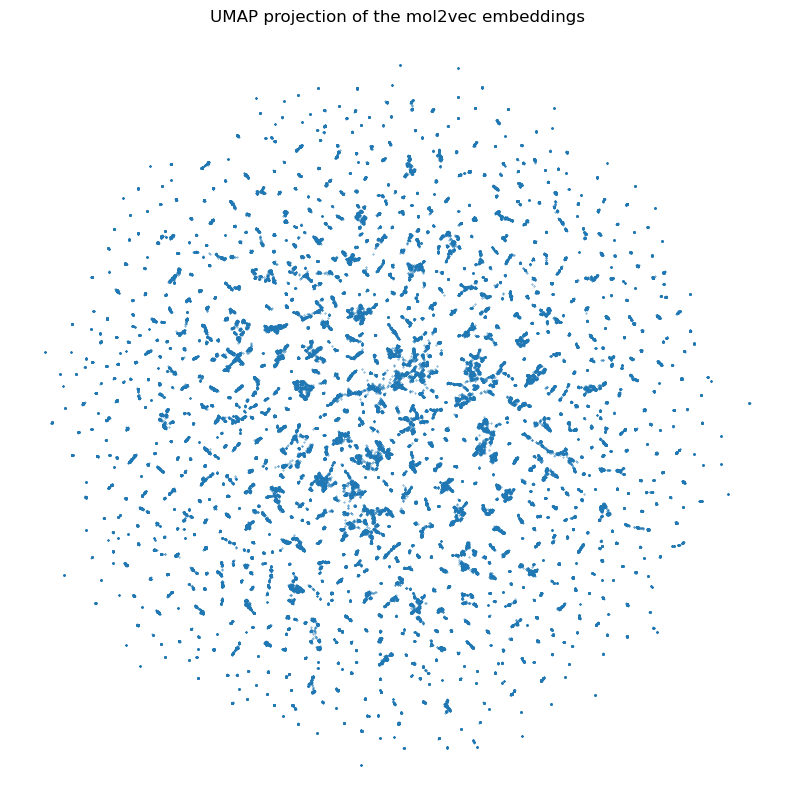

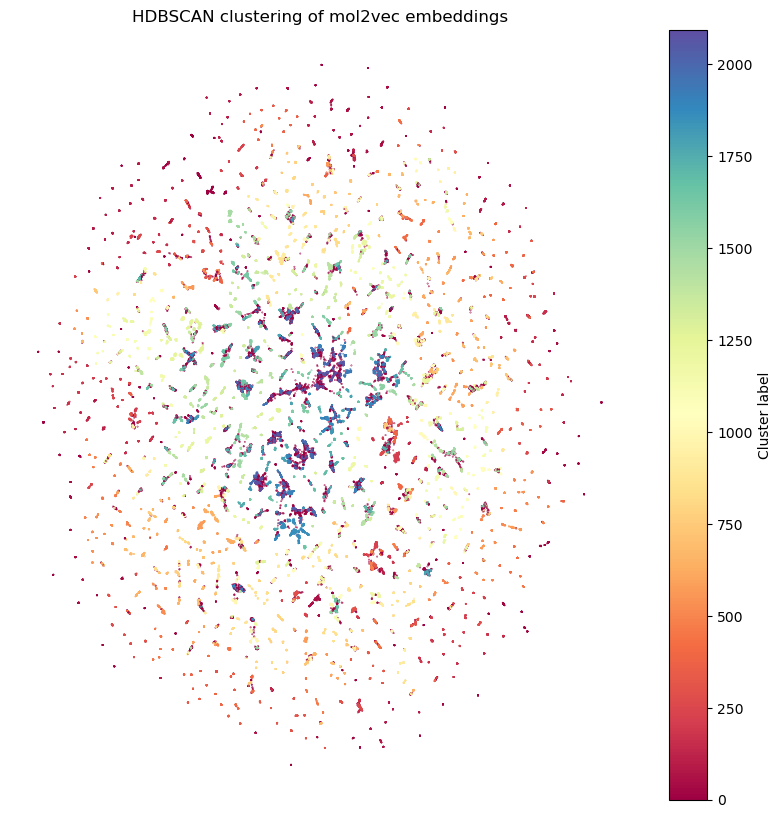

In [18]:
import umap
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import hdbscan
import seaborn as sns


embedding = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean').fit_transform(X) #Mahalanobis metric is not working with HDBSCAN
print(embedding.shape)

plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], s=0.1, cmap='Spectral')
plt.title('UMAP projection of the mol2vec embeddings')
plt.axis('off')
plt.savefig('umap.png', dpi=300, bbox_inches='tight')
plt.show()

# Clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom').fit(embedding)

# Plotting clusters
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusterer.labels_, s=0.1, cmap='Spectral')
plt.title('HDBSCAN clustering of mol2vec embeddings')
plt.axis('off')
plt.colorbar(label='Cluster label')
plt.savefig('clusters.png', dpi=300, bbox_inches='tight')
plt.show()

HDBSCAN TESTS

(133244, 2)


C:\Users\locua\AppData\Local\Temp\ipykernel_18676\609240516.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=0.1, cmap='Spectral')


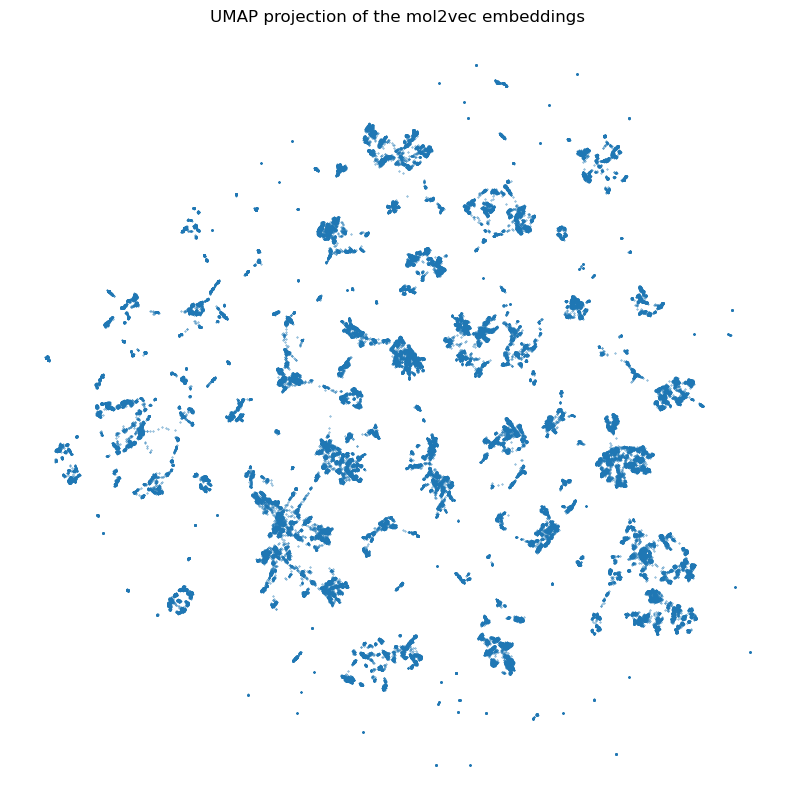

In [4]:
import umap
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import hdbscan
import seaborn as sns


embedding = umap.UMAP(n_neighbors=50, min_dist=0.1, n_components=2, metric='cosine').fit_transform(X) #Mahalanobis metric is not working with HDBSCAN
print(embedding.shape)

plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], s=0.1, cmap='Spectral')
plt.title('UMAP projection of the mol2vec embeddings')
plt.axis('off')
plt.savefig('umap.png', dpi=300, bbox_inches='tight')
plt.show()



EOM, min=50, euclidean

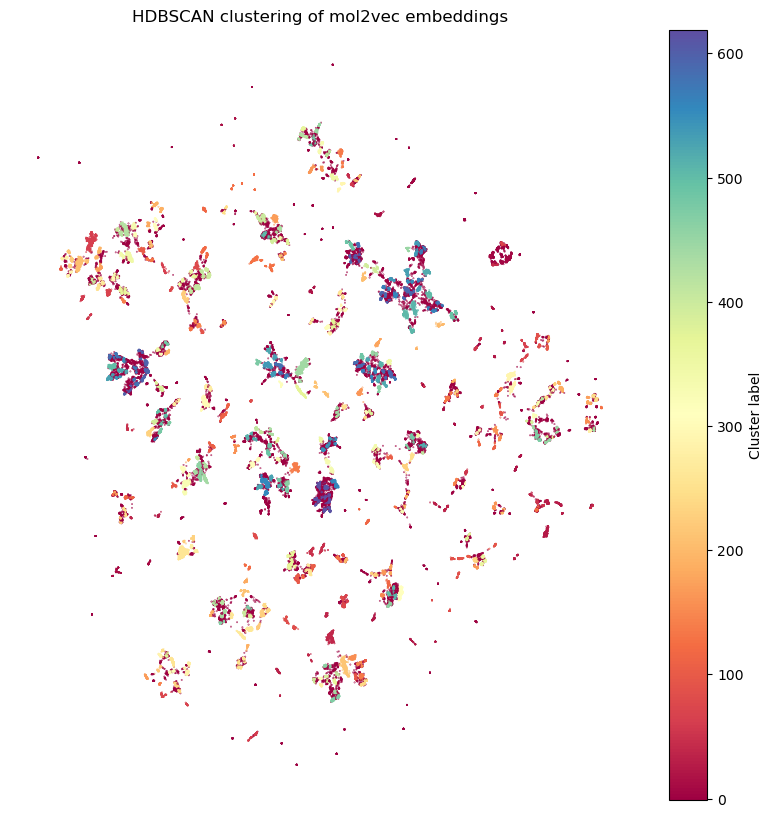

In [6]:
# Clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, metric='euclidean', cluster_selection_method='eom').fit(embedding)

# Plotting clusters
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusterer.labels_, s=0.1, cmap='Spectral')
plt.title('HDBSCAN clustering of mol2vec embeddings')
plt.axis('off')
plt.colorbar(label='Cluster label')
plt.savefig('clusters.png', dpi=300, bbox_inches='tight')
plt.show()

EOM, min=50, manhattan

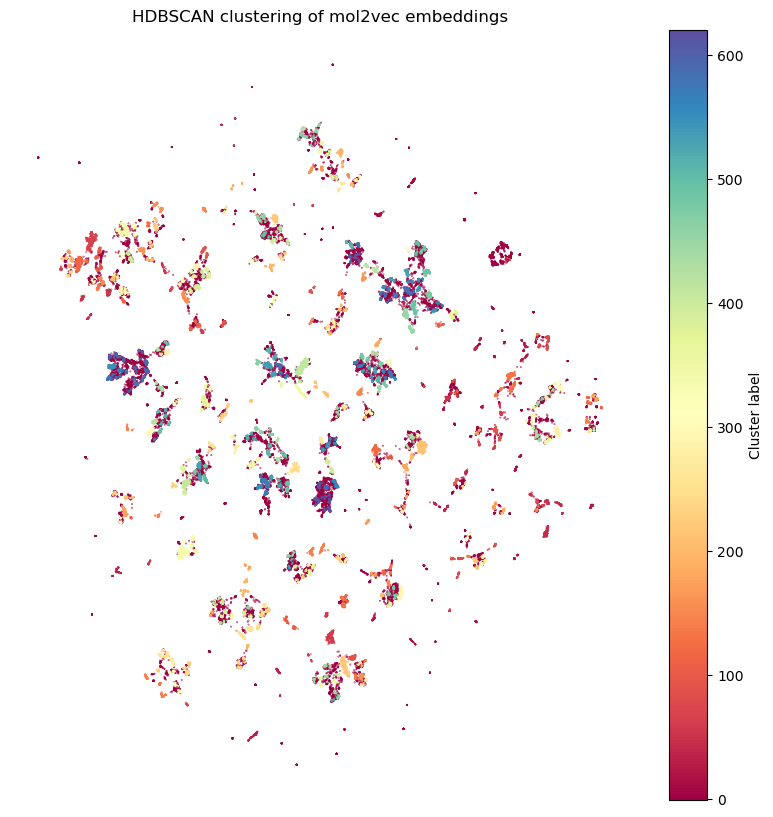

In [ ]:
# Clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, metric='manhattan', cluster_selection_method='eom').fit(embedding)

# Plotting clusters
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusterer.labels_, s=0.1, cmap='Spectral')
plt.title('HDBSCAN clustering of mol2vec embeddings')
plt.axis('off')
plt.colorbar(label='Cluster label')
plt.savefig('clusters.png', dpi=300, bbox_inches='tight')
plt.show()

leaf, min=50, euclidean

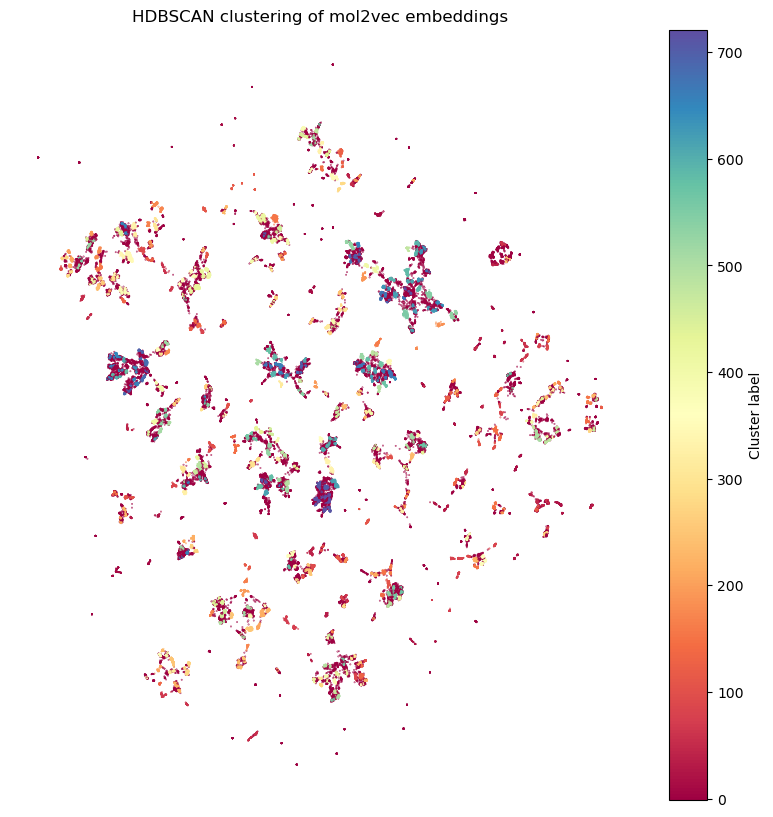

In [17]:
# Clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, metric='euclidean', cluster_selection_method='leaf').fit(embedding)

# Plotting clusters
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusterer.labels_, s=0.1, cmap='Spectral')
plt.title('HDBSCAN clustering of mol2vec embeddings')
plt.axis('off')
plt.colorbar(label='Cluster label')
plt.savefig('clusters.png', dpi=300, bbox_inches='tight')
plt.show()

leaf, min=50, manhattan

720


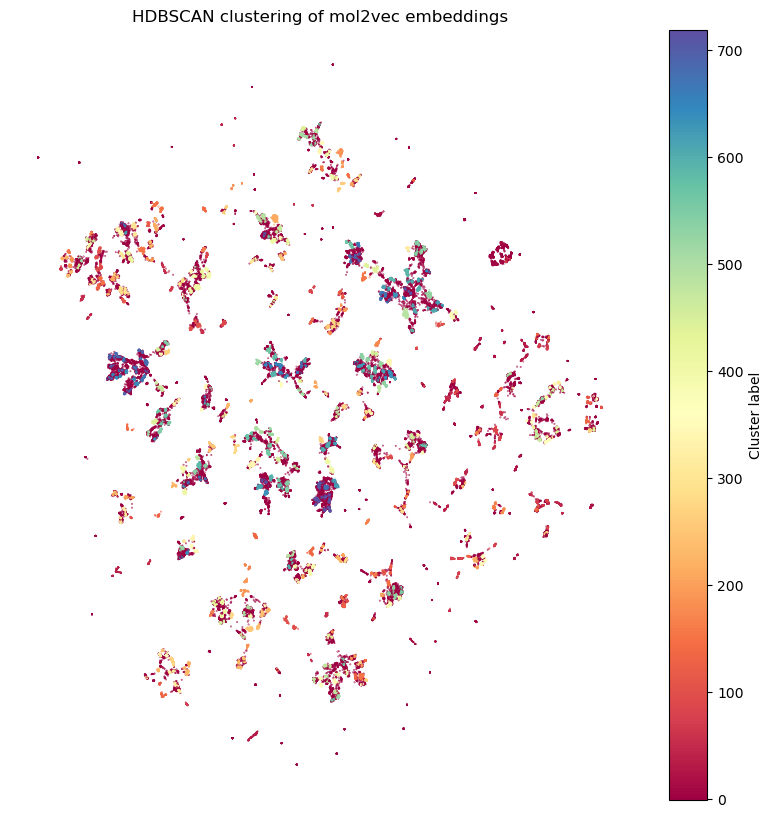

In [23]:
# Clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, metric='manhattan', cluster_selection_method='leaf').fit(embedding)
labels = clusterer.labels_
print(len(set(labels)) - (1 if -1 in labels else 0))

# Plotting clusters
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusterer.labels_, s=0.1, cmap='Spectral')
plt.title('HDBSCAN clustering of mol2vec embeddings')
plt.axis('off')
plt.colorbar(label='Cluster label')
plt.savefig('clusters.png', dpi=300, bbox_inches='tight')
plt.show()

Encontrar mejor clustering

Params: mcs=10, ms=5 -> Clusters=2028, Noise=0.14, DBCV=0.2758, cse=0.0
Params: mcs=10, ms=5 -> Clusters=508, Noise=0.00, DBCV=0.3022, cse=0.1
Params: mcs=10, ms=5 -> Clusters=285, Noise=0.00, DBCV=0.3605, cse=0.2
Params: mcs=10, ms=10 -> Clusters=1678, Noise=0.15, DBCV=0.2709, cse=0.0
Params: mcs=10, ms=10 -> Clusters=537, Noise=0.01, DBCV=0.2611, cse=0.1
Params: mcs=10, ms=10 -> Clusters=286, Noise=0.00, DBCV=0.3182, cse=0.2
Params: mcs=25, ms=5 -> Clusters=1212, Noise=0.11, DBCV=0.3022, cse=0.0
Params: mcs=25, ms=5 -> Clusters=424, Noise=0.01, DBCV=0.3047, cse=0.1
Params: mcs=25, ms=5 -> Clusters=243, Noise=0.00, DBCV=0.3604, cse=0.2
Params: mcs=25, ms=10 -> Clusters=1154, Noise=0.12, DBCV=0.2903, cse=0.0
Params: mcs=25, ms=10 -> Clusters=462, Noise=0.01, DBCV=0.2679, cse=0.1
Params: mcs=25, ms=10 -> Clusters=251, Noise=0.00, DBCV=0.3200, cse=0.2
Params: mcs=25, ms=15 -> Clusters=1082, Noise=0.13, DBCV=0.3102, cse=0.0
Params: mcs=25, ms=15 -> Clusters=472, Noise=0.02, DBCV=0.2604, c

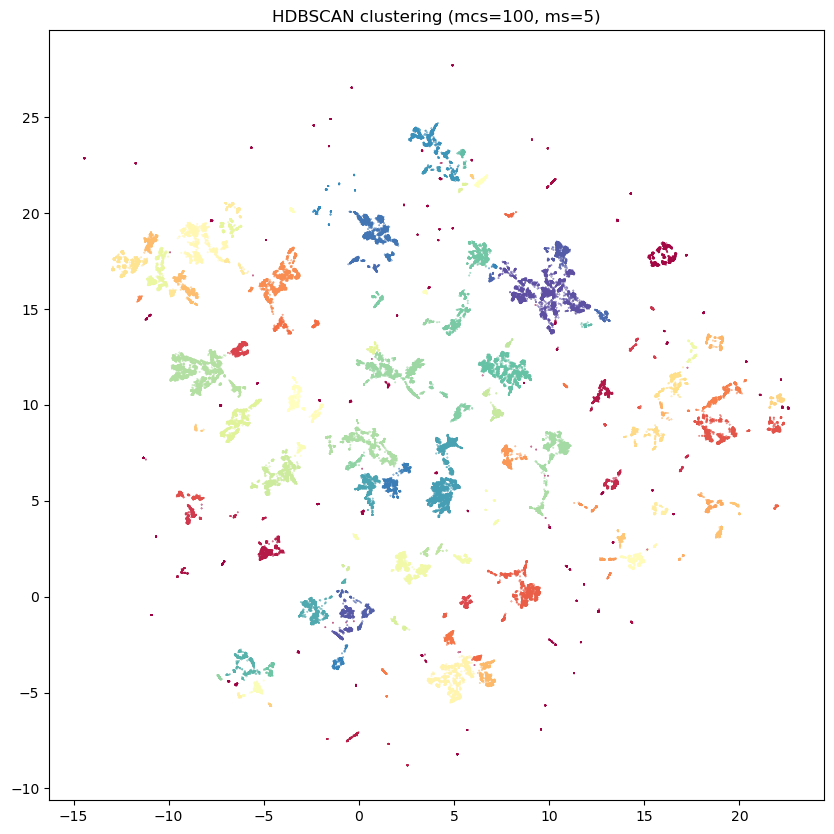

In [ ]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

min_cluster_sizes = [10, 25, 50, 75, 100]
min_samples_options = [5, 10, 15, 25]
cluster_selection_epsilons = [0.0, 0.1, 0.2]

best_score = -1
best_params = {}
results = []

for mcs in min_cluster_sizes:
    for ms in min_samples_options:
        for cse in cluster_selection_epsilons:
            if ms > mcs:
                    continue

            try:
                clusterer = hdbscan.HDBSCAN(
                    min_cluster_size=mcs,
                    min_samples=ms,
                    metric='euclidean',
                    cluster_selection_method='eom',
                    cluster_selection_epsilon=cse,
                    gen_min_span_tree=True
                )
                clusterer.fit(embedding)

                labels = clusterer.labels_
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                noise_ratio = np.sum(labels == -1) / len(labels)

                # Need at least 2 clusters and < N-1 labels assigned for silhouette/DB
                if n_clusters >= 2 and n_clusters < (len(labels) - np.sum(labels == -1)) :
                    # Use DBCV
                    try:
                            dbcv_score = clusterer.relative_validity_
                    except Exception as e:
                            print(f"Could not calculate DBCV for mcs={mcs}, ms={ms}: {e}")
                            dbcv_score = -1 # Assign a bad score

                    # sil_score = silhouette_score(embedding, labels)
                    # db_score = davies_bouldin_score(embedding, labels)

                    print(f"Params: mcs={mcs}, ms={ms} -> Clusters={n_clusters}, Noise={noise_ratio:.2f}, DBCV={dbcv_score:.4f}, cse={cse}")
                    results.append({'mcs': mcs, 'ms': ms, 'n_clusters': n_clusters, 'noise': noise_ratio, 'dbcv': dbcv_score, 'cse': cse})

                    # Optimize for highest DBCV
                    if dbcv_score > best_score:
                        best_score = dbcv_score
                        best_params = {'min_cluster_size': mcs, 'min_samples': ms, 'cluster_selection_epsilon': cse}

                else:
                    print(f"Params: mcs={mcs}, ms={ms} -> Clusters={n_clusters}, Noise={noise_ratio:.2f}, DBCV=N/A (not enough clusters)")
                    results.append({'mcs': mcs, 'ms': ms, 'n_clusters': n_clusters, 'noise': noise_ratio, 'dbcv': None})


            except Exception as e:
                print(f"Error fitting HDBSCAN with mcs={mcs}, ms={ms}: {e}")

print(f"\nBest parameters found (based on DBCV): {best_params} with score {best_score}")

# re-run HDBSCAN with best_params and plot
if best_params:
    best_clusterer = hdbscan.HDBSCAN(**best_params, metric='euclidean', cluster_selection_method='eom').fit(embedding)
    plt.figure(figsize=(10, 10))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=best_clusterer.labels_, s=0.1, cmap='Spectral')
    plt.title(f'HDBSCAN clustering (mcs={best_params["min_cluster_size"]}, ms={best_params["min_samples"]})')
    plt.show()

164


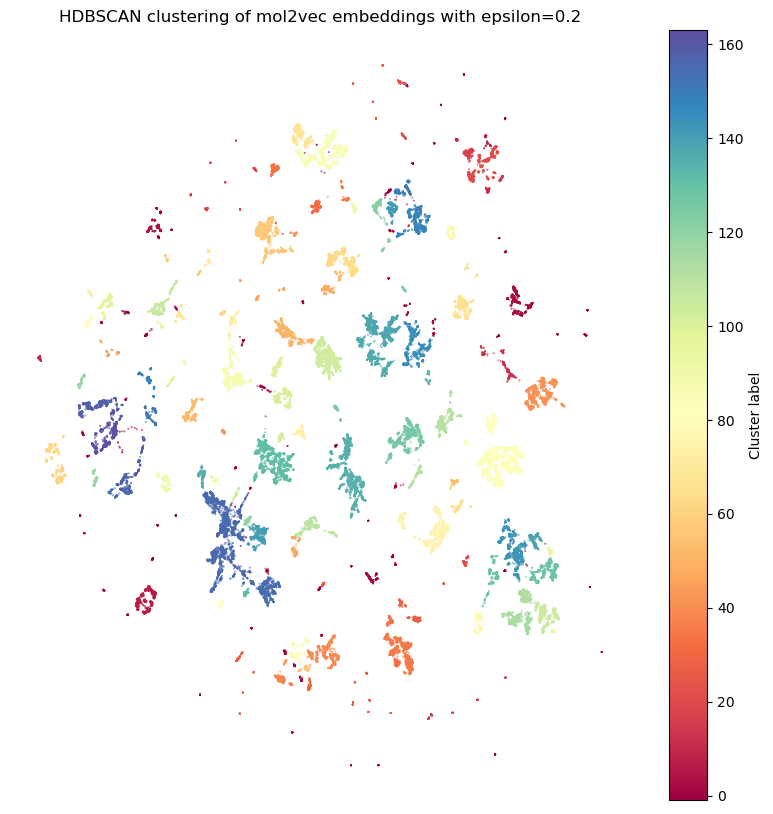

In [5]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=5, cluster_selection_epsilon=0.2, metric='euclidean', cluster_selection_method='eom').fit(embedding)
labels = clusterer.labels_
print(len(set(labels)) - (1 if -1 in labels else 0))

# Plotting clusters
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusterer.labels_, s=0.1, cmap='Spectral')
plt.title('HDBSCAN clustering of mol2vec embeddings with epsilon=0.2')
plt.axis('off')
plt.colorbar(label='Cluster label')
plt.savefig('clusters.png', dpi=300, bbox_inches='tight')
plt.show()

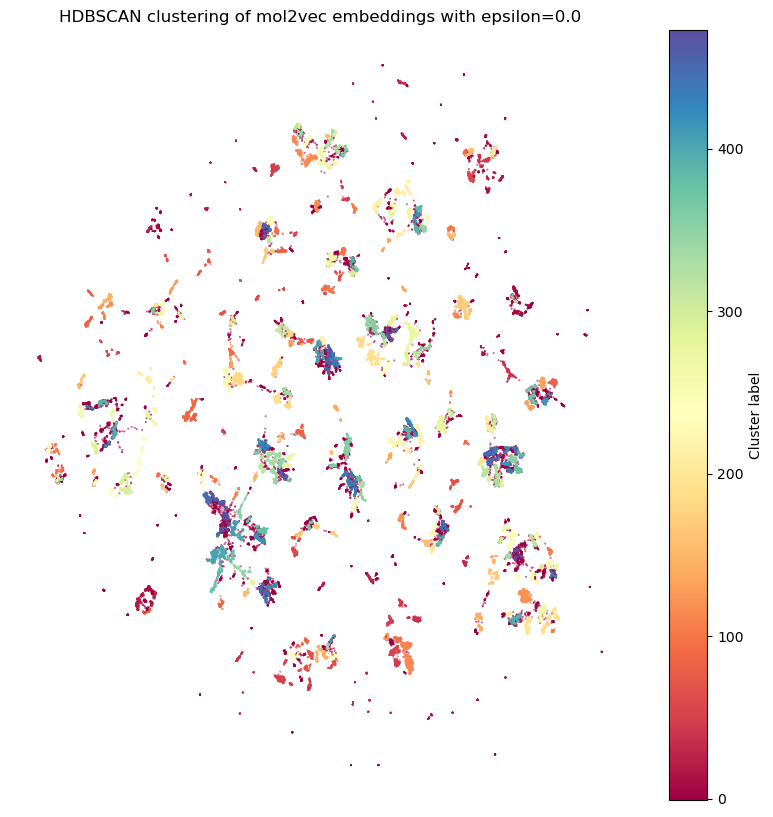

In [6]:
clusterer_e0 = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=5, cluster_selection_epsilon=0.0, metric='euclidean', cluster_selection_method='eom').fit(embedding)
labels_e0 = clusterer_e0.labels_

plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels_e0, s=0.1, cmap='Spectral')
plt.title('HDBSCAN clustering of mol2vec embeddings with epsilon=0.0')
plt.axis('off')
plt.colorbar(label='Cluster label')
plt.savefig('clusters_e0.png', dpi=300, bbox_inches='tight')
plt.show()


Extract Embedding

In [10]:
import random

labels = clusterer.labels_ # Shape (N,) - Cluster assignment for each point
# embedding = embedding      # Your 2D UMAP data, shape (N, 2)
# --------------------------------

# 1. Get unique cluster IDs, excluding noise (-1)
unique_labels = np.unique(labels)
valid_cluster_ids = unique_labels[unique_labels != -1]

# 2. Check if any valid clusters exist
if len(valid_cluster_ids) == 0:
    print("No valid clusters found (all points might be noise).")
else:
    # 3. Choose a random cluster ID from the valid ones
    target_cluster_id = random.choice(valid_cluster_ids)
    print(f"Randomly selected cluster ID: {target_cluster_id}")

    # 4. Create a boolean mask for the selected cluster
    cluster_mask = (labels == target_cluster_id)

    # 5. Apply the mask to extract the embeddings for that cluster
    embeddings_in_cluster = embedding[cluster_mask]

    print(f"Number of points in cluster {target_cluster_id}: {len(embeddings_in_cluster)}")

    # You can now work with 'embeddings_in_cluster'
    # For example, print the first 5 embeddings in this cluster:
    if len(embeddings_in_cluster) > 0:
        print("First 5 embeddings in this cluster:")
        print(embeddings_in_cluster[:5])
    else:
         # This shouldn't happen if the ID was in valid_cluster_ids, but good practice
         print(f"Cluster {target_cluster_id} reported as valid, but no points found (check data consistency).")


Randomly selected cluster ID: 83
Number of points in cluster 83: 5426
First 5 embeddings in this cluster:
[[16.727032  -1.1288338]
 [16.755754  -0.9393191]
 [16.75647   -0.7434757]
 [16.753036  -1.2586353]
 [16.765621  -0.8064031]]


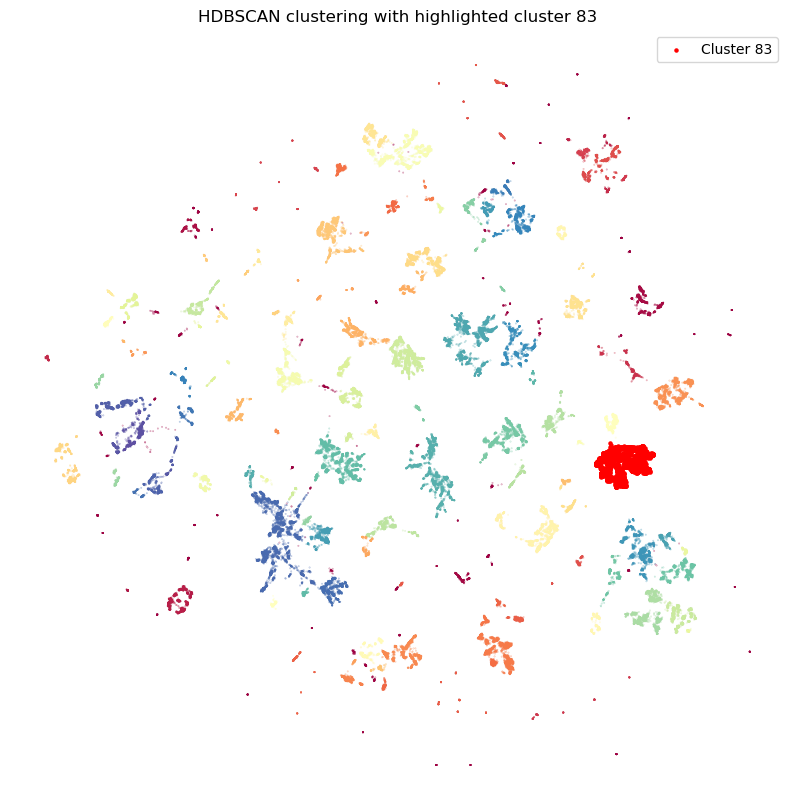

In [11]:
# Visualize the selected cluster
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, s=0.1, cmap='Spectral', alpha=0.5)
plt.scatter(embeddings_in_cluster[:, 0], embeddings_in_cluster[:, 1], c='red', s=5, label=f'Cluster {target_cluster_id}')
plt.title(f'HDBSCAN clustering with highlighted cluster {target_cluster_id}')
plt.axis('off')
plt.legend()
plt.show()

Graph molecules

SMILES for embedding 393: C#CC1(C)CC1
SMILES for embedding 394: CC1(C#N)CC1
SMILES for embedding 397: C#C[C@]1(C)CO1
SMILES for embedding 400: C#CC1(O)CC1
SMILES for embedding 401: N#CC1(O)CC1
SMILES for embedding 1314: C#C[C@@H]1CC1(C)C
SMILES for embedding 1315: CC1(C)C[C@H]1C#N
SMILES for embedding 1316: C#C[C@@H]1NC1(C)C
SMILES for embedding 1317: CC1(C)N[C@H]1C#N
SMILES for embedding 1318: C#C[C@@H]1OC1(C)C
SMILES for embedding 1319: CC1(C)O[C@H]1C#N
SMILES for embedding 1320: C#C[C@@H]1C[C@@]1(C)O
SMILES for embedding 1321: C[C@@]1(O)C[C@H]1C#N
SMILES for embedding 1691: C#CC1(C)CCC1
SMILES for embedding 1692: CC1(C#N)CCC1
SMILES for embedding 1693: C[C@@]1(C#N)CCN1
SMILES for embedding 1694: C#C[C@]1(C)CCO1
SMILES for embedding 1695: C[C@@]1(C#N)CCO1
SMILES for embedding 1696: C#CC1(C)COC1
SMILES for embedding 1697: CC1(C#N)COC1
SMILES for embedding 1698: N#CC1(N)CCC1
SMILES for embedding 1700: N#CC1(N)COC1
SMILES for embedding 1701: C#CC1(O)CCC1
SMILES for embedding 1702: N#CC1

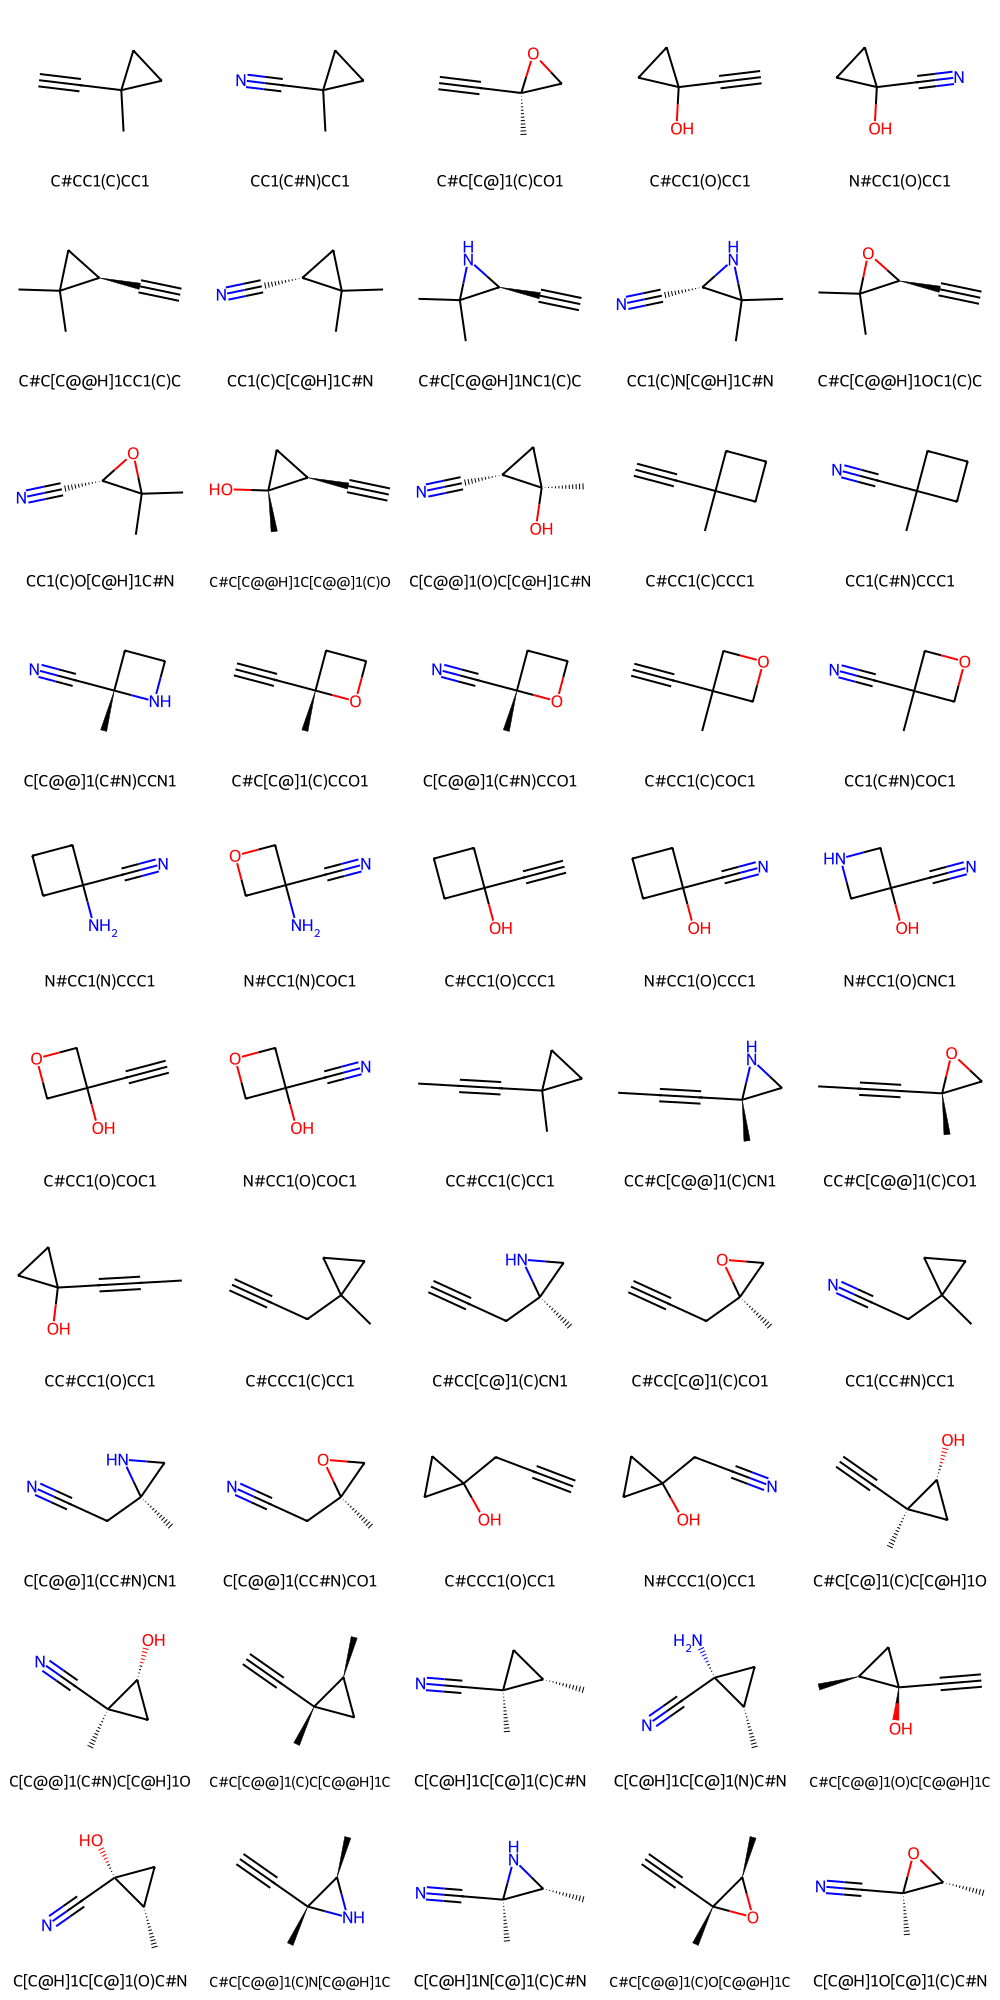

In [12]:
import mol2vec
from mol2vec import features
from rdkit import Chem
from rdkit.Chem import Draw

chems = []
# Get smile from df
for emb in embeddings_in_cluster:
    # Get the index of the embedding in the original dataframe
    index = np.where((embedding == emb).all(axis=1))[0][0]
    
    # Get the corresponding SMILES string from the original dataframe
    smiles = df.iloc[index, 2] 
    print(f"SMILES for embedding {index}: {smiles}")
    
    # Convert SMILES to RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)
    chems.append(mol)

# Draw the molecules in the selected cluster
Draw.MolsToGridImage(chems, molsPerRow=5, subImgSize=(200, 200), legends = [Chem.MolToSmiles(mol) for mol in chems])
    


Extract embedding epsilon = 0

In [45]:
import random

labels_e0 = clusterer_e0.labels_ # Shape (N,) - Cluster assignment for each point
# embedding = embedding      # Your 2D UMAP data, shape (N, 2)
# --------------------------------

# 1. Get unique cluster IDs, excluding noise (-1)
unique_labels = np.unique(labels_e0)
valid_cluster_ids = unique_labels[unique_labels != -1]

# 2. Check if any valid clusters exist
if len(valid_cluster_ids) == 0:
    print("No valid clusters found (all points might be noise).")
else:
    # 3. Choose a random cluster ID from the valid ones
    target_cluster_id = random.choice(valid_cluster_ids)
    print(f"Randomly selected cluster ID: {target_cluster_id}")

    # 4. Create a boolean mask for the selected cluster
    cluster_mask = (labels_e0 == target_cluster_id)

    # 5. Apply the mask to extract the embeddings for that cluster
    embeddings_in_cluster = embedding[cluster_mask]

    print(f"Number of points in cluster {target_cluster_id}: {len(embeddings_in_cluster)}")

    # You can now work with 'embeddings_in_cluster'
    # For example, print the first 5 embeddings in this cluster:
    if len(embeddings_in_cluster) > 0:
        print("First 5 embeddings in this cluster:")
        print(embeddings_in_cluster[:5])
    else:
         # This shouldn't happen if the ID was in valid_cluster_ids, but good practice
         print(f"Cluster {target_cluster_id} reported as valid, but no points found (check data consistency).")


Randomly selected cluster ID: 285
Number of points in cluster 285: 324
First 5 embeddings in this cluster:
[[10.243267   5.3068147]
 [10.223644   5.226264 ]
 [10.259859   5.333298 ]
 [10.30057    5.3590794]
 [10.126972   5.2419276]]


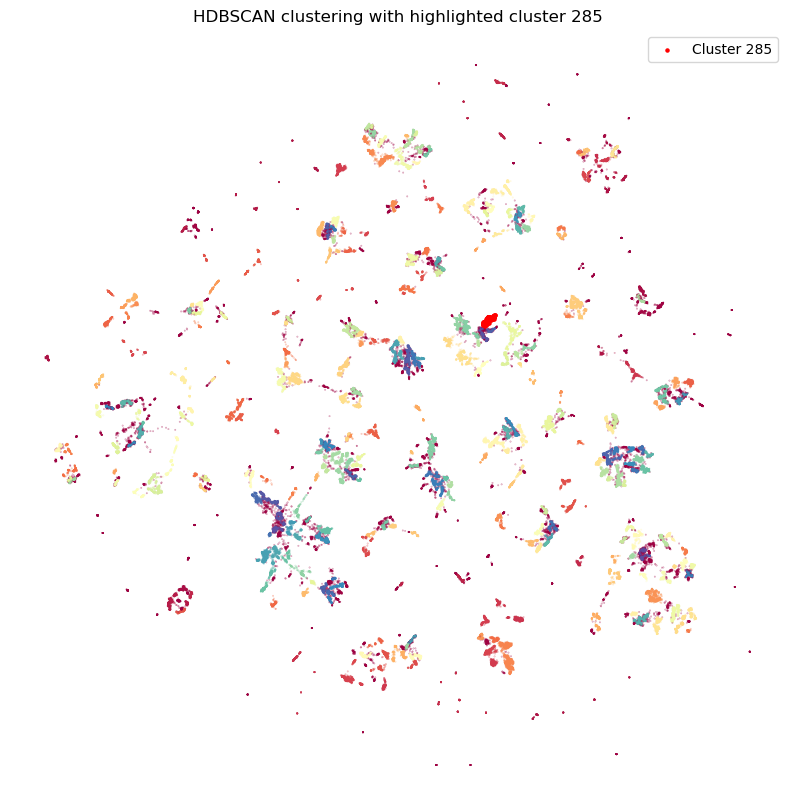

In [46]:
# Visualize the selected cluster
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels_e0, s=0.1, cmap='Spectral', alpha=0.5)
plt.scatter(embeddings_in_cluster[:, 0], embeddings_in_cluster[:, 1], c='red', s=5, label=f'Cluster {target_cluster_id}')
plt.title(f'HDBSCAN clustering with highlighted cluster {target_cluster_id}')
plt.axis('off')
plt.legend()
plt.show()

SMILES for embedding 609: C[C@H]1C[C@H]1CO
SMILES for embedding 612: CC[C@H]1C[C@H]1C
SMILES for embedding 613: CC[C@H]1C[C@H]1O
SMILES for embedding 620: OC[C@H]1C[C@H]1O
SMILES for embedding 2323: CCC[C@H]1C[C@H]1O
SMILES for embedding 2335: OCC[C@H]1C[C@H]1O
SMILES for embedding 2781: C[C@H]1CC[C@H]1CO
SMILES for embedding 2784: CC[C@H]1CC[C@H]1C
SMILES for embedding 2785: CC[C@H]1CC[C@H]1O
SMILES for embedding 2792: OC[C@H]1CC[C@H]1O
SMILES for embedding 2841: CC[C@@H]1C[C@@H]1CC
SMILES for embedding 2842: CC[C@H]1C[C@H]1CO
SMILES for embedding 2851: OC[C@@H]1C[C@@H]1CO
SMILES for embedding 3082: C[C@@H]1[C@H](C)[C@@H]1CO
SMILES for embedding 3084: C[C@H]1[C@@H](O)[C@H]1CO
SMILES for embedding 3085: CC[C@@H]1[C@H](C)[C@@H]1C
SMILES for embedding 3086: CC[C@H]1[C@@H](C)[C@H]1O
SMILES for embedding 3088: CC[C@@H]1[C@H](O)[C@@H]1O
SMILES for embedding 3093: OC[C@@H]1[C@H](O)[C@@H]1O
SMILES for embedding 3303: CC[C@H]1C[C@H]2C[C@@H]12
SMILES for embedding 3310: OC[C@H]1C[C@H]2C[C@@H]12

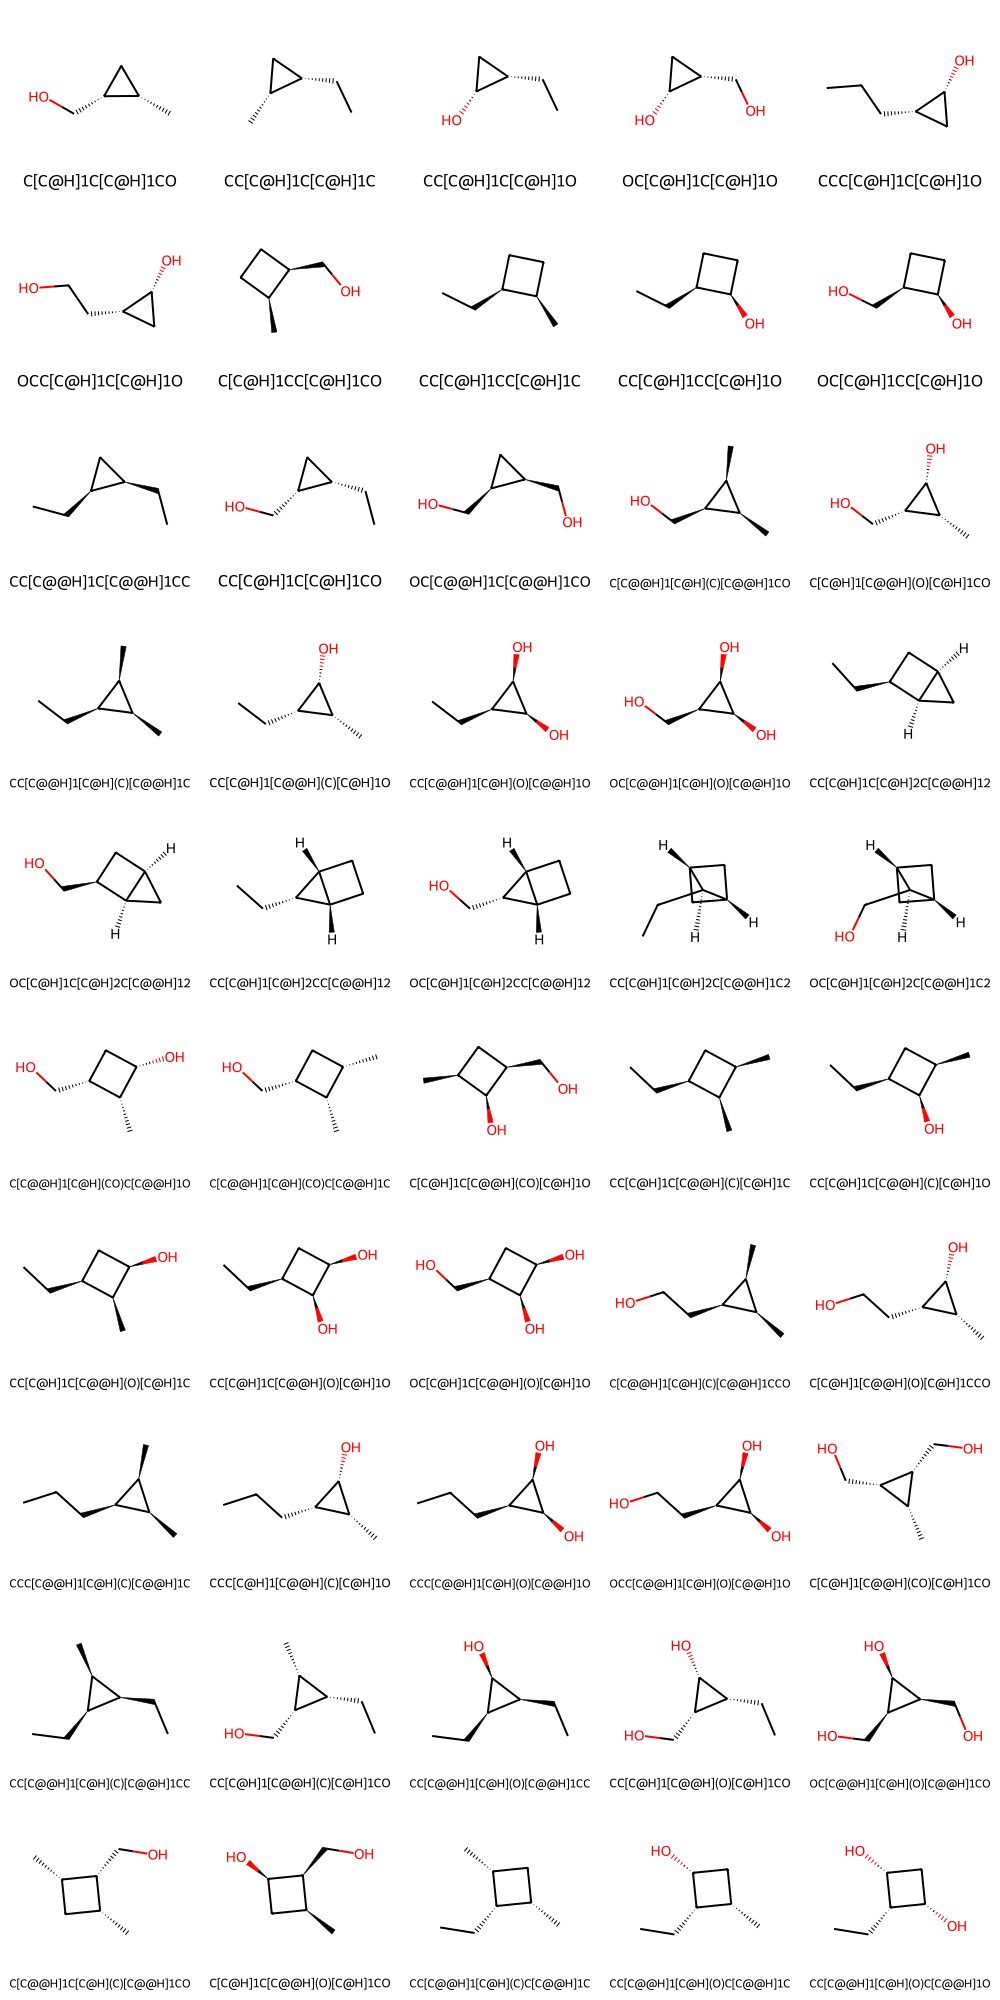

In [47]:
import mol2vec
from mol2vec import features
from rdkit import Chem
from rdkit.Chem import Draw

chems = []
# Get smile from df
for emb in embeddings_in_cluster:
    # Get the index of the embedding in the original dataframe
    index = np.where((embedding == emb).all(axis=1))[0][0]
    
    # Get the corresponding SMILES string from the original dataframe
    smiles = df.iloc[index, 2] 
    print(f"SMILES for embedding {index}: {smiles}")
    
    # Convert SMILES to RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)
    chems.append(mol)

# Draw the molecules in the selected cluster
Draw.MolsToGridImage(chems, molsPerRow=5, subImgSize=(200, 200), legends = [Chem.MolToSmiles(mol) for mol in chems])